# Reference Mapping Using cell embedding by pretrained scGPT model

In [1]:
import sys
from pathlib import Path

import numpy as np
import pandas as pd
from scipy.stats import mode
import scanpy as sc
import sklearn
import warnings

sys.path.insert(0, "../")
import scgpt as scg

# extra dependency for similarity search
try:
    import faiss

    faiss_imported = True
except ImportError:
    faiss_imported = False
    print(
        "faiss not installed! We highly recommend installing it for fast similarity search."
    )
    print("To install it, see https://github.com/facebookresearch/faiss/wiki/Installing-Faiss")

warnings.filterwarnings("ignore", category=ResourceWarning)

/home/s1772341/data_pi-drukkerm/herbermannc/miniconda3/envs/scgpt2/lib/python3.10/site-packages/faiss/loader.py:28: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numpy.__version__) >= "1.19":
/home/s1772341/data_pi-drukkerm/herbermannc/miniconda3/envs/scgpt2/lib/python3.10/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


## Reference mapping using the CellXGene atlas

We have previously built the index for all the cells in normal samples, over 33 million cells in total. You can find the code to build the index at [build_atlas_index_faiss.py](build_atlas_index_faiss.py).
We applied careful tuning to eventually well balance between the accuracy and efficiency. Now the actual building process takes less than 3 minutes and we choose to use only 16 bytes to store the vector per cell, which leads to 808 MB for the whole index of all the millions of cells. Please download the faiss index folder from https://drive.google.com/drive/folders/1q14U50SNg5LMjlZ9KH-n-YsGRi8zkCbe?usp=sharing.

Faiss is required to use the index. Please install it by following the instructions at https://github.com/facebookresearch/faiss/wiki/Installing-Faiss

In [2]:
model_dir = Path("/data1/projects/pi-drukkerm/herbermannc/practicedata/scGPT_human")

In [3]:
adata = sc.read_h5ad("/data1/projects/pi-drukkerm/herbermannc/practicedata/CFS_all_days_rawcount.h5ad")
gene_col = "index"

/home/s1772341/data_pi-drukkerm/herbermannc/miniconda3/envs/scgpt2/lib/python3.10/site-packages/anndata/_io/utils.py:207: OldFormatWarning: Element '/obs/__categories/sample' was written without encoding metadata.
  return func(*args, **kwargs)
/home/s1772341/data_pi-drukkerm/herbermannc/miniconda3/envs/scgpt2/lib/python3.10/site-packages/anndata/_io/utils.py:207: OldFormatWarning: Element '/obs/sample' was written without encoding metadata.
  return func(*args, **kwargs)
/home/s1772341/data_pi-drukkerm/herbermannc/miniconda3/envs/scgpt2/lib/python3.10/site-packages/anndata/_io/utils.py:207: OldFormatWarning: Element '/obs/_index' was written without encoding metadata.
  return func(*args, **kwargs)
/home/s1772341/data_pi-drukkerm/herbermannc/miniconda3/envs/scgpt2/lib/python3.10/site-packages/anndata/_io/utils.py:207: OldFormatWarning: Element '/var/_index' was written without encoding metadata.
  return func(*args, **kwargs)


In [4]:
# Subset the AnnData object to include only observations where the 'sample' variable is one day
day0 = adata[adata.obs['sample'] == 'CFS_Day0', :]
day2 = adata[adata.obs['sample'] == 'CFS_Day2', :]
day14 = adata[adata.obs['sample'] == 'CFS_Day14', :]
day28 = adata[adata.obs['sample'] == 'CFS_Day28', :]

In [5]:
day0_embed = scg.tasks.embed_data(
    day0,
    model_dir,
    gene_col=gene_col,
    batch_size=64,
    return_new_adata=True,
)

/data1/projects/pi-drukkerm/herbermannc/scGPT/tutorials/../scgpt/tasks/cell_emb.py:190: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["index"] = adata.var.index


scGPT - INFO - match 28358/40588 genes in vocabulary of size 60697.


Embedding cells: 100%|██████████| 165/165 [00:46<00:00,  3.55it/s]
/home/s1772341/data_pi-drukkerm/herbermannc/miniconda3/envs/scgpt2/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [6]:
day2_embed = scg.tasks.embed_data(
    day2,
    model_dir,
    gene_col=gene_col,
    batch_size=64,
    return_new_adata=True,
)

/data1/projects/pi-drukkerm/herbermannc/scGPT/tutorials/../scgpt/tasks/cell_emb.py:190: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["index"] = adata.var.index


scGPT - INFO - match 28358/40588 genes in vocabulary of size 60697.


Embedding cells: 100%|██████████| 126/126 [00:30<00:00,  4.11it/s]
/home/s1772341/data_pi-drukkerm/herbermannc/miniconda3/envs/scgpt2/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [7]:
day14_embed = scg.tasks.embed_data(
    day14,
    model_dir,
    gene_col=gene_col,
    batch_size=64,
    return_new_adata=True,
)

/data1/projects/pi-drukkerm/herbermannc/scGPT/tutorials/../scgpt/tasks/cell_emb.py:190: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["index"] = adata.var.index


scGPT - INFO - match 28358/40588 genes in vocabulary of size 60697.


Embedding cells: 100%|██████████| 178/178 [00:43<00:00,  4.05it/s]
/home/s1772341/data_pi-drukkerm/herbermannc/miniconda3/envs/scgpt2/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [5]:
day28_embed = scg.tasks.embed_data(
    day28,
    model_dir,
    gene_col=gene_col,
    batch_size=64,
    return_new_adata=True,
)

/data1/projects/pi-drukkerm/herbermannc/scGPT/tutorials/../scgpt/tasks/cell_emb.py:190: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["index"] = adata.var.index


scGPT - INFO - match 28358/40588 genes in vocabulary of size 60697.


Embedding cells: 100%|██████████| 153/153 [00:51<00:00,  2.97it/s]
/home/s1772341/data_pi-drukkerm/herbermannc/miniconda3/envs/scgpt2/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [6]:
from build_atlas_index_faiss import load_index, vote

In [7]:
#use_gpu = faiss.get_num_gpus() > 0
index, meta_labels = load_index(
    index_dir="/data1/projects/pi-drukkerm/herbermannc/practicedata/faiss_index/",
    use_config_file=True,
    use_gpu=True,
)
print(f"Loaded index with {index.ntotal} cells")

Loading index and meta from /data1/projects/pi-drukkerm/herbermannc/practicedata/faiss_index/ ...
Index loaded, num_embeddings: 35096827
Set nprobe from 128 to 128 for 16384 clusters
Loaded index with 35096827 cells


The search runs super fast, especially on GPU. Here the similarity search for 4,000 query cells within the whole reference of millions should take around 7 second on CPU and 0.1 second on GPU.

In [8]:
day28_emb = day28_embed.X

In [17]:
day28_embed

AnnData object with n_obs × n_vars = 9734 × 512

In [9]:
%%time
k = 50
distances, idx = index.search(day28_emb, k)

predict_labels = meta_labels[idx]
# from scipy.stats import mode
from tqdm import tqdm

voting = []
for preds in tqdm(predict_labels):
    voting.append(vote(preds, return_prob=False)[0])
voting = np.array(voting)

100%|██████████| 9734/9734 [00:00<00:00, 15393.21it/s]

CPU times: user 910 ms, sys: 653 ms, total: 1.56 s
Wall time: 2.88 s


Here, we propagate the previously saved cell type labels, `meta_label`, from CellXGene annotations by majority voting.

In [10]:
day28.obs['celltype'] = voting

In [11]:
sc.pp.neighbors(day28,n_pcs=50, use_rep="X")
sc.tl.umap(day28)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


/home/s1772341/data_pi-drukkerm/herbermannc/miniconda3/envs/scgpt2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


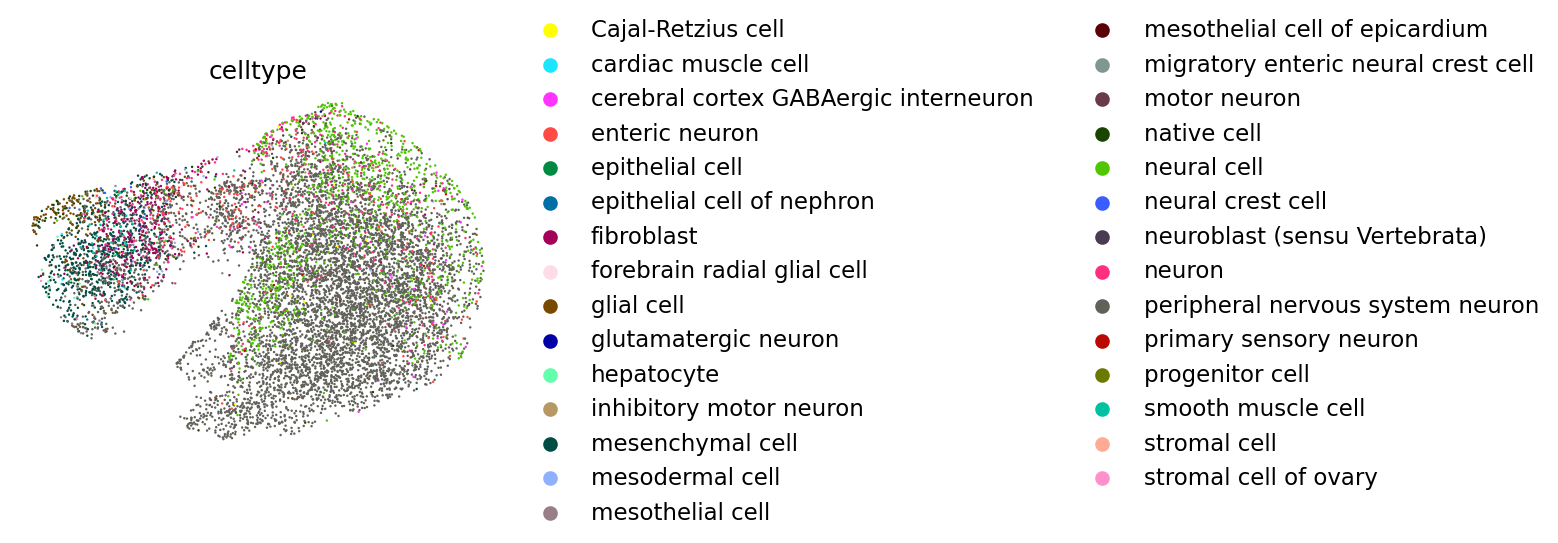

In [12]:
sc.pl.umap(day28, color='celltype', frameon=False, wspace=0.4)

In [18]:
print(voting[:10])  # Propagated CellXGene labels

['beta' 'beta' 'beta' 'beta' 'PSC' 'beta' 'beta' 'beta' 'ductal' 'alpha']
['neuroendocrine cell' 'classical monocyte' 'neuroendocrine cell'
 'neuroendocrine cell' 'mural cell' 'classical monocyte' 'stromal cell'
 'myeloid cell' 'malignant cell' 'stromal cell']


Currently, we found the CellXGene labels are scattered in different levels of the cell type hieratchy, with more generic cell types such as stromal cells in great abundance. The difference in the number of cells in each cell type may lead to less useful annotations, even though the similarity search itself may be sufficiently accurate. We are working on a better way to curate the cell type labels in a consistent way. Our current idea is plan to apply hierarchical predictions and provide a spectrum of cell type labels for each cell, from generic to more specific cell types.

You may see the proportion of cell types in the meta labels by running
```python
from build_atlas_index_faiss import compute_category_proportion
compute_category_proportion(meta_labels)
```

Meanwhile, the propagation of major cell types is usually more accurate. An example with endothelial cells is provided as follows. 

In [ ]:
sc.pp.neighbors(adata, n_pcs=50,use_rep="X")

In [ ]:
sc.tl.umap(adata)

In [ ]:
day28 = adata[adata.obs['sample'] == 'CFS_Day28', :]

In [ ]:
day28.obs['celltype'] = voting

In [ ]:
sc.pl.umap(day28, color='celltype', frameon=False, wspace=0.4)